In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
91,ham,Sorry to be a pain. Is it ok if we meet anothe...,NaN,NaN,NaN
4767,ham,I'm not sure if its still available though,NaN,NaN,NaN
1122,ham,Ok.ok ok..then..whats ur todays plan,NaN,NaN,NaN
5486,ham,Ofcourse I also upload some songs,NaN,NaN,NaN
368,ham,Wat uniform? In where get?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 	1. Data cleaning
# 	2. EDA
# 	3. Text Pre processing
# 	4. Model Building
# 	5. Improvement
# 	6. Deployment


**1.Data Cleaning**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop las 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
1361,ham,Shuhui say change 2 suntec steamboat? U noe wh...
2990,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
4311,ham,I keep ten rs in my shelf:) buy two egg.
3581,ham,You are right. Meanwhile how's project twins c...
2009,ham,I can't keep going through this. It was never ...


In [9]:
# renaming column names
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)
df.sample(5)

,Target,Text
1419,ham,\Speak only when you feel your words are bette...
1913,ham,You want to go?
642,ham,Probably gonna swing by in a wee bit
1272,ham,Ok...
5112,spam,December only! Had your mobile 11mths+? You ar...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicate
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

**2.EDS**

In [18]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

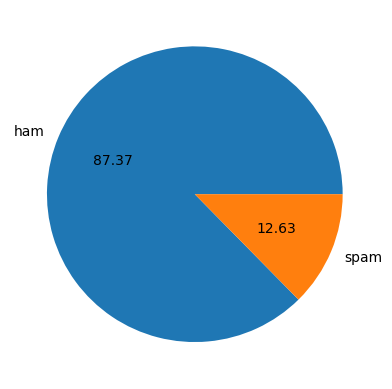

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['Text'].apply(len)

In [26]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# fro ham messages
df[df['Target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
# spam
df[df['Target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

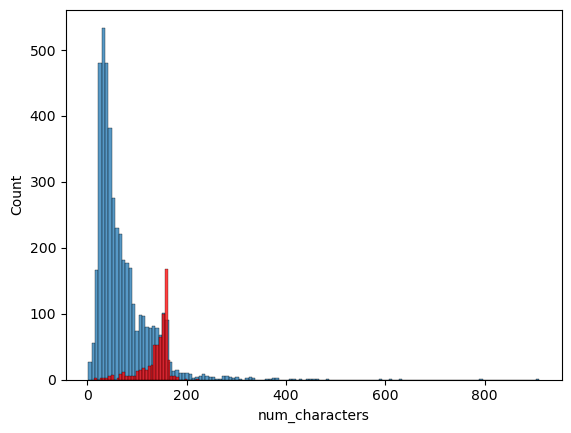

In [35]:
sns.histplot(df[df['Target']==0] ['num_characters'])  #ham
sns.histplot(df[df['Target']==1] ['num_characters'], color='red')  #spam

<Axes: xlabel='num_words', ylabel='Count'>

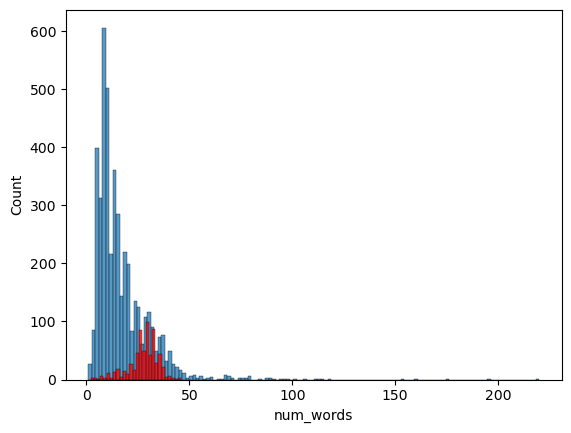

In [36]:
sns.histplot(df[df['Target']==0] ['num_words'])  #ham
sns.histplot(df[df['Target']==1] ['num_words'], color='red')  #spam

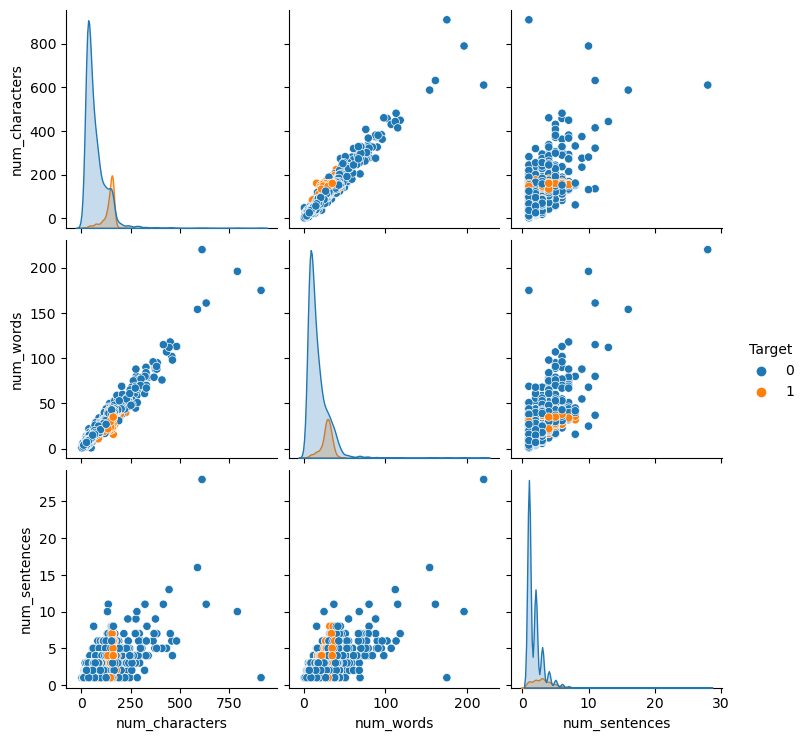

In [37]:
sns.pairplot(df,hue='Target')

C:\Users\shash\AppData\Local\Temp\ipykernel_21644\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

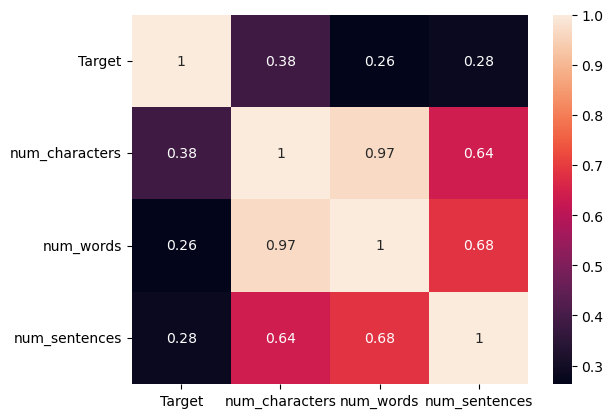

In [38]:
sns.heatmap(df.corr(), annot=True)

**3.Data(Text) PreProcessing**

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')  # Download the stopwords data if not already downloaded

def transform_text(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y = []
    
    ps = PorterStemmer()  # Initialize the PorterStemmer object
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
transform_text('loving man is good')

'love man good'

In [41]:
df['Text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [42]:
from nltk.stem.porter import PorterStemmer  #Stemming
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [43]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [44]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
print(df.columns)

Index(['Target', 'Text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')


In [47]:
spam_wc = wc.generate(df[df['Target'] ==1]['transformed_text'].str.cat(sep=" "))

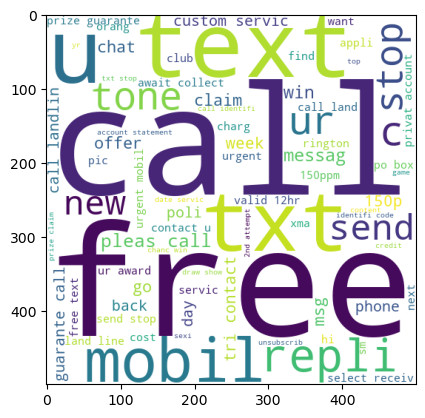

In [48]:
plt.imshow(spam_wc)

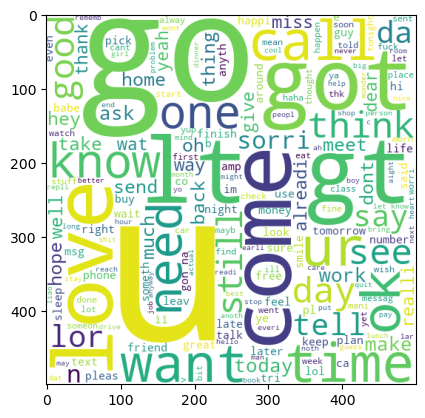

In [49]:
ham_wc = wc.generate(df[df['Target'] ==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [50]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus = [ ]
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [52]:
len(spam_corpus)

9939

In [53]:
ham_corpus = [ ]
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

35394

**4.Model Building**

In [55]:
!pip install --upgrade scikit-learn
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 3000)

In [58]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [59]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [60]:
y = df['Target'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)   
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#here 0.88 is accuracy
#precision is low

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [67]:
mnb.fit(X_train,y_train)   
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#here 0.96 is accuracy
#precision is ok

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [68]:
bnb.fit(X_train,y_train)   
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
#here 0.96 is accuracy
#precision is good 83

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [69]:
#tfidf --> mnb

In [70]:
# !pip install xgboost

# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn. ensemble import AdaBoostClassifier
# from sklearn. ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier


In [71]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression (solver='liblinear', penalty='11')
# rfc = RandomForestClassifier (n_estimators=50, random_state=2)
# abc = AdaBoostClassifier (n_estimators=50, random_state=2)
# bc = BaggingClassifier (n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier (n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
# xgb = XGBClassifier(n_estimators=50, random_state=2)


In [72]:
# clfs = {
#     'SVC' : SVC,
#     'KN' : knc,
#     'NB' : mnb,
#     'DT' : dtc,
#     'LR' : lrc,
#     'RF' : rfc,
#     'AdaBoost' : abc,
#     'BgC' : bc,
#     'ETC' : etc,
#     'GBDT' : gbdt,
#     'xgb' : xgb
# }

In [73]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [74]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [75]:

clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [76]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [77]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [78]:
accuracy_scores = [ ]
precision_scores = [ ]
for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("for ",name)
    print("Accuracy- ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  SVC
Accuracy-  0.9758220502901354
Precision -  0.9747899159663865
for  KN
Accuracy-  0.9052224371373307
Precision -  1.0
for  NB
Accuracy-  0.9709864603481625
Precision -  1.0
for  DT
Accuracy-  0.9294003868471954
Precision -  0.8282828282828283
for  LR
Accuracy-  0.9584139264990329
Precision -  0.9702970297029703
for  RF
Accuracy-  0.9748549323017408
Precision -  0.9827586206896551
for  AdaBoost
Accuracy-  0.960348162475822
Precision -  0.9292035398230089
for  BgC
Accuracy-  0.9574468085106383
Precision -  0.8671875
for  ETC
Accuracy-  0.9748549323017408
Precision -  0.9745762711864406
for  GBDT
Accuracy-  0.9477756286266924
Precision -  0.92
for  xgb
Accuracy-  0.971953578336557
Precision -  0.943089430894309


In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [80]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [82]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


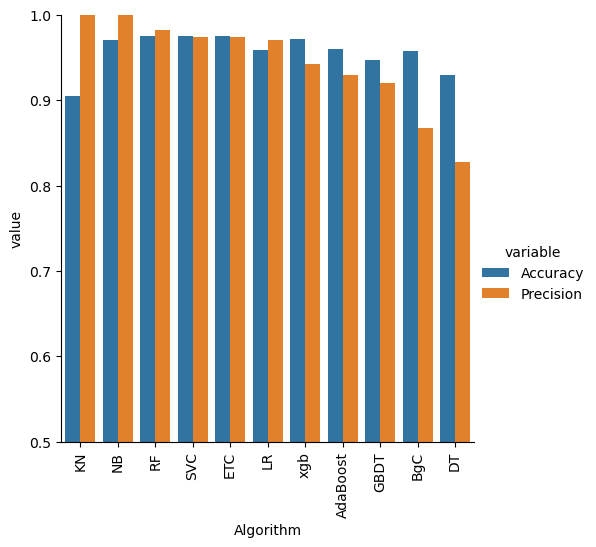

In [83]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [86]:
performance_df.merge(temp_df, on="Algorithm")

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188


In [87]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [88]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [89]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [90]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [91]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [92]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [93]:
from sklearn.ensemble import StackingClassifier

In [94]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [95]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9259259259259259


In [96]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))